In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
temp = load_iris()
dataset = pd.DataFrame(temp.data, columns=temp.feature_names)
dataset["Label"] = temp.target

X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1],
                                                    test_size=0.2, shuffle=True, random_state=42)


In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam',
                      max_iter=500, random_state=42, learning_rate_init=0.01)
model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10, 10), learning_rate_init=0.01,
              max_iter=500, random_state=42)

In [5]:
y_pred = model.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



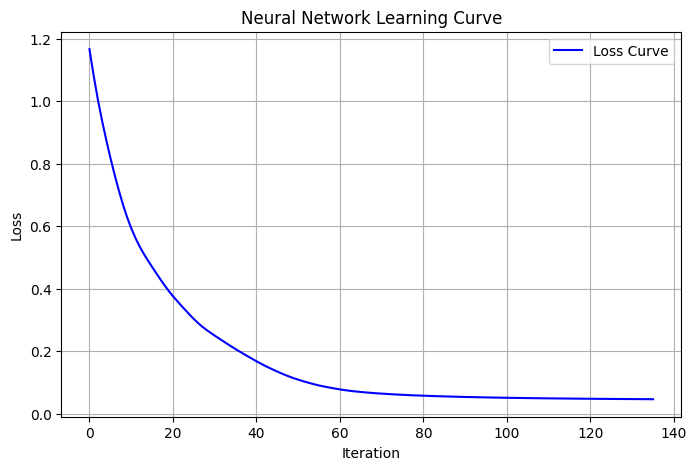

In [7]:
plt.figure(figsize=(8,5))
loss_curve = model.loss_curve_
plt.title("Neural Network Learning Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.plot(range(len(loss_curve)), loss_curve, label='Loss Curve', color='blue')
plt.legend()
plt.show()